# 1. Load cultural references

In [2]:
import pandas as pd
import os
import spacy
from tqdm import tqdm
import numpy as np
nlp = spacy.load('en_core_web_sm')
nlp.max_length = 3000000
import random

import matplotlib.pyplot as plt

In [37]:
authors=['bachman','harris', 'straub', 'koontz', 'king']
with open("bachman_all-cultural-references.txt", encoding='utf8') as f:
    entities = f.readlines()

In [44]:
", ".join(sorted(list(set([(entity.strip())  for entity in entities if len(entity.strip()) > 0]))))

"A&S Tires, A. Gordon Pym, AP wire, Abdul Allhazred, Adreizi Brothers, Agatha Christie, Ahab, Albert Einstein, Alfie, Alligators All Around, American Express, Amoco, Amos ’n Andy, Amway, Anacin, Anaïs, And Justice for All, Andy Devine, Annie Oakley, Apple, Arco, Arlene Dahl, Art Linkletter, Aureomycin, Avis, B&O, BMW, Bach, Bally, Band-Aid, Banjo Rag, Banker’s Life Insurance, Barbie, Bausch & Lomb, Be-Bop, Be-bop-a-lula, she's my baby, Beach Boys, Beatles, Beechcraft, Ben Alexander, Bermuda, Bertrand Russell, Beverly Hill-billies, Big Mac, Bill Cullen, Black Jack gum, Blackglama, Bob Hope, Bobby Sherman, Bombardier Skidoo, Bonneville, Brain from Planet Arous, Brian Wilson, Briggs & Stratton, Broderick Crawford, Bruce Springsteen, Bud, Budweiser, Buick, Burger King, Buttercup, Cadillac, Caesar's Palace, Calvin Klein, Camel, Campbell, Canada Mints, Captain Midnight, Captain Queeg, Chancellor-Brinkley, Chargers, Charles Manson, Charmin, Chatty Cathy, Cheez-Doodles, Chesterfield, Chevrolet

In [3]:
import re 


def clean_quotes(string):
    return re.sub("[\'’]", '', string )

True

In [4]:
bachman_entities = list(set([clean_quotes(entity.strip().lower())  for entity in entities if len(entity.strip()) > 0]))
bachman_entities

['kalishnikov',
 'lionel richie',
 'arlene dahl',
 'chipwich',
 'ring-dings',
 'mcdonald',
 'hula hoops',
 'good-bye yellow brick road',
 'national geographic',
 'facing the lions',
 'garfield',
 'slurpy',
 'nike',
 'trans am',
 'stetsons',
 'samsonite',
 'polaroid',
 'caesars palace',
 'briggs & stratton',
 'bausch & lomb',
 'pequod',
 'let it bleed',
 'disney',
 'larry',
 'home box office',
 'mr. bojangles',
 'time magazine',
 'yorick',
 'norman vincent peale',
 'john carradine',
 'perrier',
 'elvis',
 'mercedes',
 'horchow',
 'toyota',
 'texaco',
 'buick',
 'lee strasberg',
 'maxwell house',
 'mothra',
 'jokers wild',
 'captain queeg',
 'tarr brothers',
 'twinky',
 'ok corral',
 'louis lamour',
 'herman wouk',
 'buttercup',
 'gravy train',
 'elton john',
 'eberhard faber',
 'cheez-doodles',
 'chevy nova',
 'long island dragway',
 'band-aid',
 'rolls-royce',
 'campbell',
 'captain midnight',
 'rolaids',
 'f troop',
 'coca-cola',
 'exxon',
 'marcus welby',
 'loony tunes',
 'dylan',
 '

In [5]:
len(bachman_entities)

525

# 2. Convert books to SpaCy docs

In [11]:
authors,  titles = [], []
for file in tqdm(os.listdir()):
    if file.endswith(".txt"):
        authors.append(file.split('-')[0])
        titles.append(file.split('-')[2].split('.')[0])


100%|██████████████████████████████████████████████████████████████████████████████████████████| 31/31 [00:00<?, ?it/s]


In [12]:
titles_docs = {}


for title in tqdm(titles): 
    print(title)
    docs = []
    for file in os.listdir():
        if file.endswith(".txt") and title == file.split('-')[2].split('.')[0]:
            with open(file, encoding='utf8') as f:
                contents = f.read()
                titles_docs[title] = nlp(contents)


  0%|                                                                                           | 0/25 [00:00<?, ?it/s]

The_Long_Walk


  4%|███▎                                                                               | 1/25 [00:09<03:58,  9.93s/it]

Roadwork


  8%|██████▋                                                                            | 2/25 [00:20<03:53, 10.13s/it]

Rage


 12%|█████████▉                                                                         | 3/25 [00:26<03:02,  8.27s/it]

Blaze


 16%|█████████████▎                                                                     | 4/25 [00:35<02:57,  8.47s/it]

The_Running_Man


 20%|████████████████▌                                                                  | 5/25 [00:42<02:40,  8.03s/it]

Thinner


 24%|███████████████████▉                                                               | 6/25 [00:52<02:48,  8.88s/it]

The_Regulators


 28%|███████████████████████▏                                                           | 7/25 [01:05<03:02, 10.16s/it]

Black_Sunday


 32%|██████████████████████████▌                                                        | 8/25 [01:15<02:52, 10.17s/it]

Red_Dragon


 36%|█████████████████████████████▉                                                     | 9/25 [01:27<02:48, 10.53s/it]

The_Silence_of_the_Lambs


 40%|████████████████████████████████▊                                                 | 10/25 [01:37<02:38, 10.55s/it]

Hannibal


 44%|████████████████████████████████████                                              | 11/25 [01:51<02:39, 11.40s/it]

Carrie


 48%|███████████████████████████████████████▎                                          | 12/25 [01:57<02:09,  9.95s/it]

Salems_Lot


 52%|██████████████████████████████████████████▋                                       | 13/25 [02:14<02:23, 11.99s/it]

The_Shining


 56%|█████████████████████████████████████████████▉                                    | 14/25 [02:31<02:29, 13.56s/it]

The_Stand


 60%|█████████████████████████████████████████████████▏                                | 15/25 [03:23<04:11, 25.16s/it]

Star_Quest


 64%|████████████████████████████████████████████████████▍                             | 16/25 [03:27<02:49, 18.78s/it]

Hells_Gate


 68%|███████████████████████████████████████████████████████▊                          | 17/25 [03:33<01:58, 14.85s/it]

Haunted_Earth


 72%|███████████████████████████████████████████████████████████                       | 18/25 [03:38<01:24, 12.02s/it]

The_Eyes_of_Darkness


 76%|██████████████████████████████████████████████████████████████▎                   | 19/25 [03:48<01:07, 11.27s/it]

Darkfall


 80%|█████████████████████████████████████████████████████████████████▌                | 20/25 [04:01<00:59, 11.80s/it]

Intensity


 84%|████████████████████████████████████████████████████████████████████▉             | 21/25 [04:16<00:51, 12.83s/it]

Julia


 88%|████████████████████████████████████████████████████████████████████████▏         | 22/25 [04:26<00:35, 11.92s/it]

Shadowland


 92%|███████████████████████████████████████████████████████████████████████████▍      | 23/25 [04:43<00:27, 13.63s/it]

Floating_Dragon


 96%|██████████████████████████████████████████████████████████████████████████████▋   | 24/25 [05:07<00:16, 16.59s/it]

Hellfire_Club


100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [05:28<00:00, 13.12s/it]


# 3. Count entities in randomly-sampled 10,000-token segments

In [13]:
n_iterations = 100
segment_length = 10000

iteration = [i for i in range(0, n_iterations)]
multi_index = pd.MultiIndex.from_product([titles, iteration], names=('book_title', 'iteration'))

books_entity_counts = pd.DataFrame(index = multi_index, columns=['entity_count'])
books_entity_counts.entity_count = books_entity_counts.entity_count.fillna(0)


for title in titles: 
    for iteration in tqdm(range(0, n_iterations)):
        entity_count = 0
        doc = titles_docs[title]
        random_start_ix = random.randint(0, len(doc)-segment_length-1)
        segment_doc = doc[random_start_ix : random_start_ix+segment_length]
        for entity in bachman_entities: 
            for ent in segment_doc.ents:
                if entity == clean_quotes(ent.text.lower()):
                    entity_count += 1
        books_entity_counts.loc[title, iteration] = entity_count

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [15:35<00:00,  9.36s/it]


In [14]:
books_entity_counts

entity_count
book_title    iteration              
The_Long_Walk 0                     1
              1                     0
              2                     2
              3                     2
              4                     1
...                               ...
Hellfire_Club 95                    0
              96                    3
              97                    0
              98                    1
              99                    1

[2500 rows x 1 columns]

In [16]:
titles_authors = pd.DataFrame({"title": titles,
                              "author": authors })
entity_counts_books_authors = pd.merge(books_entity_counts.reset_index(), 
                                       titles_authors.reset_index(), 
                                       left_on='book_title', 
                                       right_on='title', 
                                       how='left' )[['author', 'book_title', 'iteration', 'entity_count']]


In [18]:
entity_counts_books_authors.to_csv("entity_counts_books_authors.csv")
entity_counts_books_authors

,author,book_title,iteration,entity_count
0,bachman,The_Long_Walk,0,1
1,bachman,The_Long_Walk,1,0
2,bachman,The_Long_Walk,2,2
3,bachman,The_Long_Walk,3,2
4,bachman,The_Long_Walk,4,1
...,...,...,...,...
2495,straub,Hellfire_Club,95,0
2496,straub,Hellfire_Club,96,3
2497,straub,Hellfire_Club,97,0
2498,straub,Hellfire_Club,98,1


# 4. Descriptive statistics of entity counts

In [13]:
df = pd.read_csv("entity_counts_books_authors.csv")
grouped = df.groupby(["author", "book_title"])['entity_count'].agg([np.mean, np.median, np.min, np.max, np.std])
grouped.to_csv("descriptive_stats_entity_counts.csv")

In [14]:
df.book_title=df.book_title.str.replace("_", " ");
df.author=df.author.str.capitalize()
df

,Unnamed: 0,author,book_title,iteration,entity_count
0,0,Bachman,The Long Walk,0,1
1,1,Bachman,The Long Walk,1,0
2,2,Bachman,The Long Walk,2,2
3,3,Bachman,The Long Walk,3,2
4,4,Bachman,The Long Walk,4,1
...,...,...,...,...,...
2495,2495,Straub,Hellfire Club,95,0
2496,2496,Straub,Hellfire Club,96,3
2497,2497,Straub,Hellfire Club,97,0
2498,2498,Straub,Hellfire Club,98,1


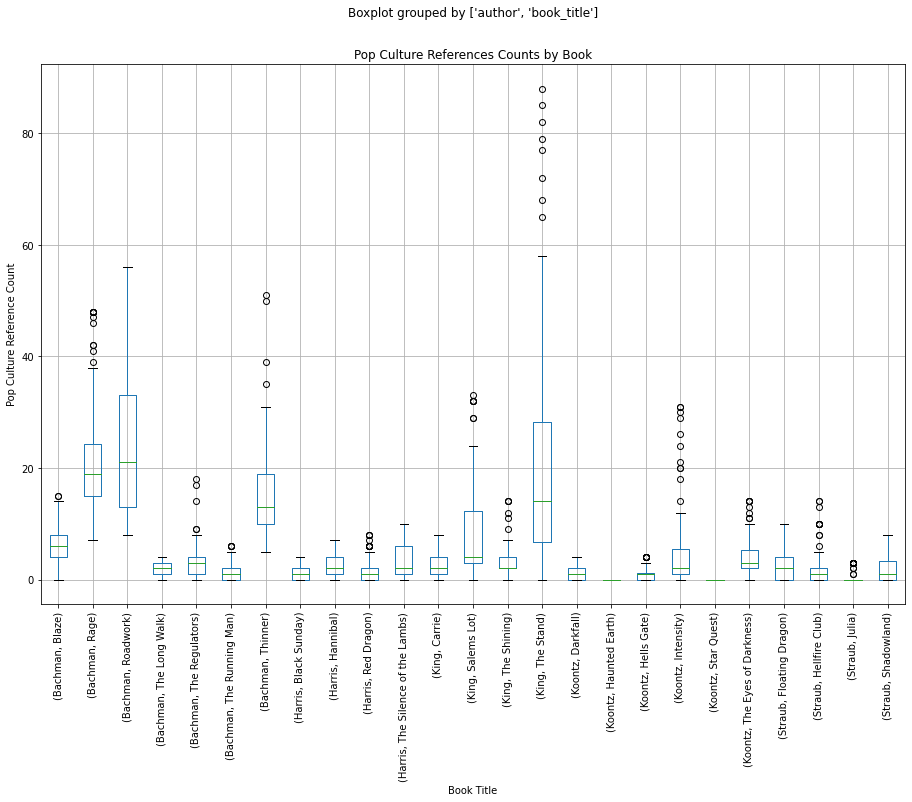

In [15]:
df.boxplot(column='entity_count', by=["author", "book_title"], rot=90, figsize=(15,10))
plt.xlabel("Book Title")
plt.ylabel("Pop Culture Reference Count")
plt.title("Pop Culture References Counts by Book")
plt.show()